In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
energy_disc21 = pd.read_csv('gdrive/MyDrive/energy_disclosure_2021_rows.csv')

In [ ]:
energy_disc21.head()

,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score
0,1007610020,325,WEST 37 STREET,48843,A,100
1,1007610022,313,WEST 37 STREET,82354,C,62
2,1007610028,307,WEST 37 STREET,102824,B,79
3,1007610033,545,8 AVENUE,166874,A,86
4,1007610037,555,8 AVENUE,162260,A,100


In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time
geolocator = Nominatim(user_agent="my-app")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
energy_disc21['Address'] = energy_disc21['Street_Number'].astype(str) + ' ' + energy_disc21['Street_Name'] + ' '+ 'NYC'
#energy_disc21['Use_Type'] = ""
energy_disc21.head()

,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score,Address
0,1007610020,325,WEST 37 STREET,48843,A,100,325 WEST 37 STREET NYC
1,1007610022,313,WEST 37 STREET,82354,C,62,313 WEST 37 STREET NYC
2,1007610028,307,WEST 37 STREET,102824,B,79,307 WEST 37 STREET NYC
3,1007610033,545,8 AVENUE,166874,A,86,545 8 AVENUE NYC
4,1007610037,555,8 AVENUE,162260,A,100,555 8 AVENUE NYC


In [ ]:
Zipcode = []
Description = []
Usetype = []
for i in range(0,100):
  try:
    location = geocode(energy_disc21['Address'][i], timeout=10)
    if location: #checks to see if a location is returned
      address = location.address.split(',')
      print(address)
      Description.append(address[0])
      Zipcode.append(address[-2])
      if address[2] == ' Battery Park City' or address[3] == ' Battery Park City' or address[4] == ' Battery Park City':
        Usetype.append('Residential')
        #energy_disc21.iloc[i,7] = 'Residential'
      else:
        Usetype.append('Commercial')
        #energy_disc21.iloc[i,7] = 'Commercial'
    else:
      Zipcode.append('N/A') #appends N/A if no location is found
      Usetype.append('N/A')
  except Exception as e: # this handles exceptions such as timeout errors
    print(f"Error processing index {i}: {e}")
    Zipcode.append('N/A')
    Usetype.append('N/A')
    time.sleep(1) # wait for a second before trying the next address
#print(Zipcode)

['Scotts Flowers NYC', ' 15', ' West 37th Street', ' Manhattan Community Board 5', ' Manhattan', ' New York County', ' City of New York', ' New York', ' 10018', ' United States']
['Scotts Flowers NYC', ' 15', ' West 37th Street', ' Manhattan Community Board 5', ' Manhattan', ' New York County', ' City of New York', ' New York', ' 10018', ' United States']
['Scotts Flowers NYC', ' 15', ' West 37th Street', ' Manhattan Community Board 5', ' Manhattan', ' New York County', ' City of New York', ' New York', ' 10018', ' United States']
['Avenue Church NYC', ' 1745', ' 1st Avenue', ' Manhattan Community Board 8', ' Manhattan', ' New York County', ' City of New York', ' New York', ' 10128', ' United States']
['Row NYC Hotel', ' 700', ' 8th Avenue', ' Manhattan Community Board 5', ' Manhattan', ' New York County', ' City of New York', ' New York', ' 10036', ' United States']
['The Australian NYC', ' 20', ' West 38th Street', ' Manhattan Community Board 5', ' Manhattan', ' New York County', ' C

In [ ]:
Usetype

['Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'N/A',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Residential',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commercial',
 'Commer

In [ ]:
energy_disc21['Zipcode'] = Zipcode
energy_disc21['Use_Type'] = Usetype
energy_disc21.head()

,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score,Address,Zipcode,Use_Type
0,1007610020,325,WEST 37 STREET,48843,A,100,325 WEST 37 STREET NYC,10018,Commercial
1,1007610022,313,WEST 37 STREET,82354,C,62,313 WEST 37 STREET NYC,10018,Commercial
2,1007610028,307,WEST 37 STREET,102824,B,79,307 WEST 37 STREET NYC,10018,Commercial
3,1007610033,545,8 AVENUE,166874,A,86,545 8 AVENUE NYC,10128,Commercial
4,1007610037,555,8 AVENUE,162260,A,100,555 8 AVENUE NYC,10036,Commercial


In [ ]:
#if missing values for a feature/variable is more than 50% consider dropping that feature
energy_disc21.isna().sum()

,0
10_Digit_BBL,0
Street_Number,0
Street_Name,0
DOF_Gross_Square_Footage,0
Energy_Efficiency_Grade,0
Energy_Star_1-100_Score,0
Address,0
Zipcode,0
Use_Type,0


In [ ]:
#energy_disc21.iloc[91:100, 7]

,Use_Type
91,Commercial
92,Commercial
93,Commercial
94,Commercial
95,Commercial
96,Commercial
97,Commercial
98,Commercial
99,Commercial


In [ ]:
#Found this row had missing values not picked up by energy_disc21.isna()
print(energy_disc21.iloc[7,])
energy_disc21.iloc[7,7] = ' 10018'
energy_disc21.iloc[7,8] = 'Commercial'
energy_disc21.iloc[7,]

10_Digit_BBL                            1007610059
Street_Number                                  344
Street_Name                         WEST 38 STREET
DOF_Gross_Square_Footage                     95402
Energy_Efficiency_Grade                          A
Energy_Star_1-100_Score                         85
Address                     344 WEST 38 STREET NYC
Zipcode                                        N/A
Use_Type                                       N/A
Name: 7, dtype: object


,7
10_Digit_BBL,1007610059
Street_Number,344
Street_Name,WEST 38 STREET
DOF_Gross_Square_Footage,95402
Energy_Efficiency_Grade,A
Energy_Star_1-100_Score,85
Address,344 WEST 38 STREET NYC
Zipcode,10018
Use_Type,Commercial


In [ ]:
energy_disc21['10_Digit_BBL'] = energy_disc21['10_Digit_BBL'].astype(str)

In [ ]:
for i in range(0,100):
  energy_disc21.iloc[i,7] = energy_disc21.iloc[i,7].strip()
len(energy_disc21.iloc[0,7])

5

**Filling Income by Zip Code Manually**

I could not find a trust worthy dataset that simply showed the median income by zip code for Manhattan. Therefore, I created a dictionary of the zip codes that were present in my current dataset. Then I searched for the median income for each zip code using the U.S. Census Bureau website. However, all zip codes were showing the same value. I used the zipdata website instead, but more than half the zip codes did not have income data. I tried searching for those zip codes in an irs data set that divides income into tax brackets. The zip codes were not present there either. The range of available incomes is not significant enough to pursue this category.

In [ ]:
mydict = {}
for i in range(0,100):
  key = energy_disc21.iloc[i,7] # Get the key from your DataFrame
  mydict[key] = mydict.get(key, 0) + 1
mydict


{'10018': 8,
 '10128': 1,
 '10036': 1,
 '10004': 30,
 '10304': 2,
 '10275': 1,
 '10280': 11,
 '10281': 3,
 '10282': 10,
 '10006': 6,
 '10310': 1,
 '10003': 3,
 '11373': 1,
 '10005': 16,
 '10041': 3,
 '11206': 1,
 '10038': 2}

In [ ]:
incomes = [149118,137253,232543, None,206150, None, None,250001, None, None, None, None, 152863,189886, None,99641]

In [ ]:
#To create a heat map of missing values
#sns.heatmap(energy_disc21.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [ ]:
#Filling missing values with the mean or the mode *if feature is categorical use value_counts to see counts of each level
#energy_disc2021['Energy_Star_1-100_Score'] = energy_disc2021['Energy_Star_1-100_Score'].fillna(#energy_disc2021['Energy_Star_1-100_Score'].mean())
#energy_disc2021['Energy_Efficiency_Grade'] = energy_disc2021['Energy_Efficiency_Grade'].fillna(#energy_disc2021['Energy_Efficiency_Grade'].mode()[0])

In [ ]:
#Dropping Street Name and Street Number
energy_disc21.drop(['Street_Number','Street_Name', 'Address'], axis=1, inplace=True)
energy_disc21.head()

,10_Digit_BBL,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score,Zipcode,Use_Type
0,1007610020,48843,A,100,10018,Commercial
1,1007610022,82354,C,62,10018,Commercial
2,1007610028,102824,B,79,10018,Commercial
3,1007610033,166874,A,86,10128,Commercial
4,1007610037,162260,A,100,10036,Commercial


In [ ]:
#To drop missing records
#energy_disc2021.dropna(inplace=True)

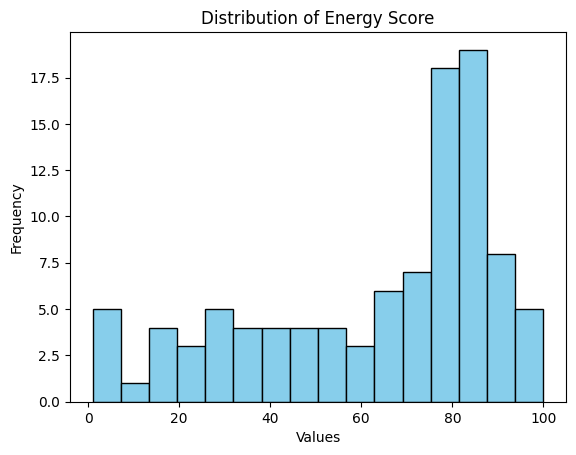

In [ ]:
plt.hist(energy_disc21['Energy_Star_1-100_Score'], bins=16, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Score')
plt.show()

The target variable, Energy Score, is normally distributed with a left skew.


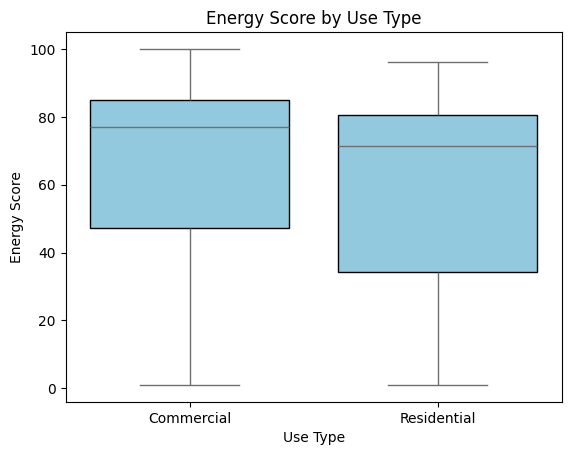

In [ ]:
sns.boxplot(data=energy_disc21, x='Use_Type', y='Energy_Star_1-100_Score', color='skyblue',**{'boxprops': {'edgecolor': 'black'}})
plt.xlabel('Use Type')
plt.ylabel('Energy Score')
plt.title('Energy Score by Use Type')
plt.show()


The boxplots show that the range of Energy Scores for Commercial and Residential buildings are similar. Even the medians are close. However, the first quartile of Energy Scores for Commerical buildings is higher than Residential buildings.

In [ ]:
#Get dummy variables for categorical variable, all categorical variables will be converted if not specified
energy_disc21_mod = pd.get_dummies(energy_disc21)
energy_disc21_mod.head()

,DOF_Gross_Square_Footage,Energy_Star_1-100_Score,10_Digit_BBL_1000050010,10_Digit_BBL_1000057501,10_Digit_BBL_1000080051,10_Digit_BBL_1000087501,10_Digit_BBL_1000090001,10_Digit_BBL_1000090014,10_Digit_BBL_1000090029,10_Digit_BBL_1000100014,...,Zipcode_10275,Zipcode_10280,Zipcode_10281,Zipcode_10282,Zipcode_10304,Zipcode_10310,Zipcode_11206,Zipcode_11373,Use_Type_Commercial,Use_Type_Residential
0,48843,100,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,82354,62,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,102824,79,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,166874,86,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,162260,100,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#To remove duplicate columns
#energy_disc21 = energy_disc21.loc[:,~energy_disc21.columns.duplicated()]
#energy_disc21.head()

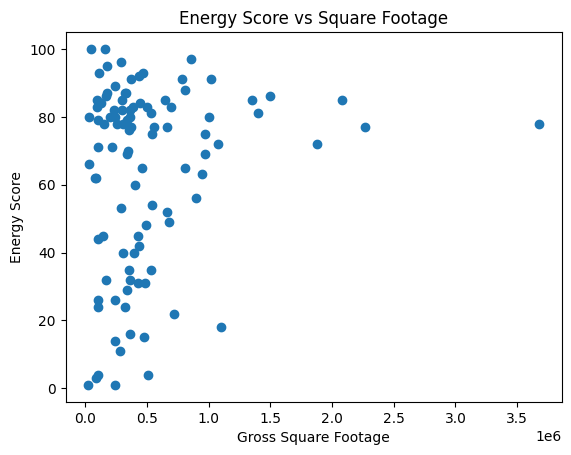

In [ ]:
plt.scatter(energy_disc21_mod['DOF_Gross_Square_Footage'], energy_disc21_mod['Energy_Star_1-100_Score'])
plt.xlabel('Gross Square Footage')
plt.ylabel('Energy Score')
plt.title('Energy Score vs Square Footage')
plt.show()

Scatterplot of the numerical data is nonlinear.

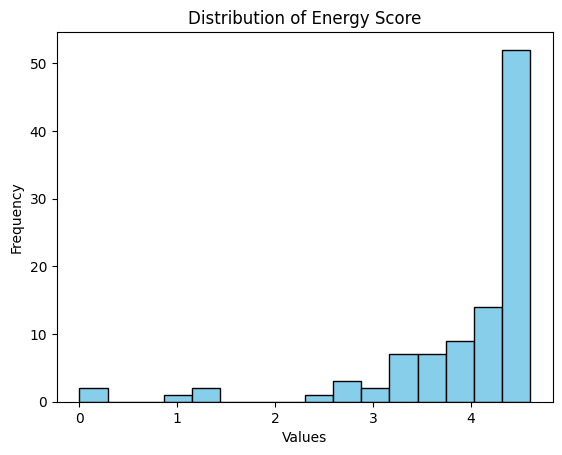

In [ ]:

# Apply log transformation using NumPy's log function, handling non-numeric values
energy_disc21_mod['log_energy_score'] = np.log(pd.to_numeric(energy_disc21_mod['Energy_Star_1-100_Score'], errors='coerce'))

# Drop rows with invalid log values (e.g., NaN or Inf)
energy_disc21_mod.dropna(subset=['log_energy_score'], inplace=True)

plt.hist(energy_disc21_mod['log_energy_score'], bins=16, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Score')
plt.show()

The log transformation did not do a good job of normalizing the data, so the original response values will be used.

In [ ]:
energy_disc21_mod.drop('log_energy_score', axis=1, inplace=True)

In [ ]:
energy_disc21_mod.columns

Index(['DOF_Gross_Square_Footage', 'Energy_Star_1-100_Score',
       '10_Digit_BBL_1000050010', '10_Digit_BBL_1000057501',
       '10_Digit_BBL_1000080051', '10_Digit_BBL_1000087501',
       '10_Digit_BBL_1000090001', '10_Digit_BBL_1000090014',
       '10_Digit_BBL_1000090029', '10_Digit_BBL_1000100014',
       ...
       'Zipcode_10275', 'Zipcode_10280', 'Zipcode_10281', 'Zipcode_10282',
       'Zipcode_10304', 'Zipcode_10310', 'Zipcode_11206', 'Zipcode_11373',
       'Use_Type_Commercial', 'Use_Type_Residential'],
      dtype='object', length=125)

**Two-sample T-test**

H_0: the difference of the means of energy scores for residential and commercial buildings is zero

H_A: the difference of the means of energy scores for residential and commercial buildings is not equal to zero

alpha level: 0.05

In [ ]:
#filter rows where energy score is
group1 = energy_disc21_mod[energy_disc21_mod['Use_Type_Commercial'] == 1]
group1.score = group1['Energy_Star_1-100_Score']
group2 = energy_disc21_mod[energy_disc21_mod['Use_Type_Residential'] == 1]
group2.score = group2['Energy_Star_1-100_Score']
t_statistic, p_value = stats.ttest_ind(group1.score, group2.score)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.0396608985781979
p-value: 0.30105572956591536


<ipython-input-26-ea97b6057fa4>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  group1.score = group1['Energy_Star_1-100_Score']
<ipython-input-26-ea97b6057fa4>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  group2.score = group2['Energy_Star_1-100_Score']


In [ ]:
#energy_disc21_mod.shape

(100, 153)

Confidence Interval: (-6.348890523522359, 19.616434383171466)


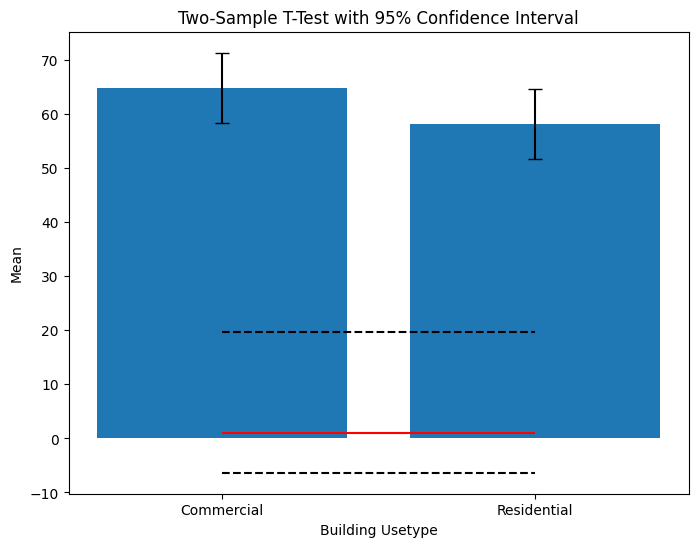

In [ ]:
mean_diff = np.mean(group1.score) - np.mean(group2.score)
#var/sqrt(n)
std_err = np.sqrt(np.var(group1.score) / len(group1.score) + np.var(group2.score) / len(group2.score))
#percentile, degrees of freedom, mean, standard error
ci_low, ci_high = stats.t.interval(0.95, len(group1.score) + len(group2.score) - 2, mean_diff, std_err)
print("Confidence Interval:", (ci_low, ci_high))

plt.figure(figsize=(8, 6))
plt.bar(['Commercial', 'Residential'], [np.mean(group1.score), np.mean(group2.score)], yerr=[std_err, std_err], capsize=5)
plt.plot([0, 1], [ci_low, ci_low], 'k--')
plt.plot([0, 1], [ci_high, ci_high], 'k--')
plt.hlines(t_statistic, 0, 1, color='red')
plt.xlabel('Building Usetype')
plt.title("Two-Sample T-Test with 95% Confidence Interval")
plt.ylabel("Mean")
plt.show()
print()

The p-value of 0.2714186030696413 is greater than the alpha level of 0.05. The t-statistic of 1.106036230489975 is within the 95% Confidence Interval of (-6.2016471246112985, 20.51559404725387). Therefore, the null hypothesis that the difference of the means of the energy scores of residential and commercial buildings is equal to zero, cannot be rejected.

In [ ]:
def getIndices (n):
  np.random.seed(42)
  samp = set()
  while len(samp) < n:
    samp.add(np.random.randint(0,100))
  return list(samp)

ind = getIndices(50)
train = energy_disc21_mod.iloc[ind,:]
test = energy_disc21_mod.iloc[~energy_disc21_mod.index.isin(ind),:]
ind1 = getIndices(70)
train_1 = energy_disc21_mod.iloc[ind1,:]
test_1 = energy_disc21_mod.iloc[~energy_disc21_mod.index.isin(ind1),:]
ind2 = getIndices(80)
train_2 = energy_disc21_mod.iloc[ind2,:]
test_2 = energy_disc21_mod.iloc[~energy_disc21_mod.index.isin(ind2),:]

In [ ]:
train.describe()

,DOF_Gross_Square_Footage,Energy_Star_1-100_Score
count,5.000000e+01,50.000000
mean,5.124168e+05,56.620000
std,6.132677e+05,29.670221
min,2.548300e+04,1.000000
25%,1.802095e+05,32.000000
50%,3.611830e+05,64.000000
75%,5.312908e+05,82.750000
max,3.678000e+06,97.000000


In [ ]:
test.describe()

,DOF_Gross_Square_Footage,Energy_Star_1-100_Score
count,5.000000e+01,50.000000
mean,5.082558e+05,69.880000
std,4.384595e+05,23.055957
min,3.461300e+04,4.000000
25%,2.328650e+05,62.750000
50%,3.635000e+05,77.000000
75%,6.586472e+05,85.000000
max,2.267925e+06,100.000000


In [ ]:
#Drop target from x_train, but keep in y_train
x_train = train.drop('Energy_Star_1-100_Score', axis=1)
y_train = train['Energy_Star_1-100_Score']

In [ ]:
test_energy_score = test['Energy_Star_1-100_Score']

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
linear_pred = model.predict(test.drop('Energy_Star_1-100_Score', axis=1))
linear_pred


array([87.97939519, 87.04693583, 32.94159361, 88.08415348, 84.38158527,
       84.95927144, 26.63938389, 75.01108397, 60.85235532, 74.65590138,
       83.19574433, 83.38739163, 27.03785473, 80.60164387, 82.7696514 ,
       80.36890633, 80.35456172, 85.48681329, 78.23118109, 25.00748264,
       72.62541828, 80.33758045, 80.21810016, 65.35576535, 72.67563416,
       89.01579588, 33.21120529, 57.82774519, 82.75100491, 82.51522234,
       91.66196151, 88.54525634, 83.44306235, 60.98555862, 83.27772373,
       74.43375643, 27.01081174, 60.013997  , 27.20472515, 32.10879182,
       83.98973173, 78.36882798, 78.38534989, 27.59377125, 31.60684516,
       80.70496444, 64.34004451, 80.04925715, 65.07273093, 80.1779762 ])

In [ ]:
linear_pred = pd.DataFrame({'Predictions':linear_pred})
linear_pred.head()

,Predictions
0,87.979395
1,87.046936
2,32.941594
3,88.084153
4,84.381585


In [ ]:
linear_results = pd.concat([round(linear_pred), test_energy_score.reset_index(drop=True, inplace=False)], axis=1)
linear_results.head()

,Predictions,Energy_Star_1-100_Score
0,88.0,100
1,87.0,100
2,33.0,22
3,88.0,93
4,84.0,91


In [ ]:
linear_results['Squared_Error'] = (linear_results['Predictions'] - linear_results['Energy_Star_1-100_Score'])**2
linear_results.head()

,Predictions,Energy_Star_1-100_Score,Squared_Error
0,88.0,100,144.0
1,87.0,100,169.0
2,33.0,22,121.0
3,88.0,93,25.0
4,84.0,91,49.0


In [ ]:
linear_mse = linear_results['Squared_Error'].mean()
linear_mse

68.82

In [ ]:
rsquared = model.score(test.drop('Energy_Star_1-100_Score', axis=1), test_energy_score)
rsquared

0.8684237917718132

**Stratify 50/50 Split**

In [ ]:
strat_train = energy_disc21_mod.drop('Energy_Star_1-100_Score', axis = 1)
strat_test  = energy_disc21_mod['Energy_Star_1-100_Score']
x_train, x_test, y_train, y_test =train_test_split(strat_train, strat_test, test_size=0.5, random_state=42, stratify=strat_train['Use_Type_Commercial'])

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

linear_pred_strat = model.predict(x_test)
stat_pred = pd.DataFrame({'Predict':linear_pred_strat})
linear_results_strat = pd.concat([round(stat_pred), y_test.reset_index(drop=True, inplace=False)], axis=1)
#linear_results_strat.head()
linear_results_strat['Squared_Error'] = (linear_results_strat['Predict'] - linear_results_strat['Energy_Star_1-100_Score'])**2
print(linear_results_strat.head())
mse_strat = linear_results_strat['Squared_Error'].mean()
mse_strat

   Predict  Energy_Star_1-100_Score  Squared_Error
0     30.0                       18          144.0
1     30.0                       14          256.0
2     77.0                       81           16.0
3     30.0                       54          576.0
4     74.0                       72            4.0


126.06

The linear model performed on the disproportionate sets perform significantly better than the stratified set.

In [ ]:
train_1.describe()

,DOF_Gross_Square_Footage,Energy_Star_1-100_Score
count,7.000000e+01,70.000000
mean,4.913854e+05,60.771429
std,5.498657e+05,29.157330
min,2.548300e+04,1.000000
25%,1.802095e+05,36.250000
50%,3.587210e+05,73.500000
75%,5.312908e+05,83.000000
max,3.678000e+06,100.000000


In [ ]:
#a bit off may want to stratify
test_1.describe()

,DOF_Gross_Square_Footage,Energy_Star_1-100_Score
count,3.000000e+01,30.000000
mean,5.545550e+05,69.033333
std,4.878944e+05,21.563832
min,3.461300e+04,24.000000
25%,2.932095e+05,60.500000
50%,3.852655e+05,76.500000
75%,6.640632e+05,85.000000
max,2.267925e+06,96.000000


In [ ]:
x1_train = train_1.drop('Energy_Star_1-100_Score', axis=1)
y1_train = train_1['Energy_Star_1-100_Score']
model_1 = linear_model.LinearRegression()
model_1.fit(x1_train, y1_train)
linear_pred1 = model_1.predict(test_1.drop('Energy_Star_1-100_Score', axis=1))
linear_pred1 = pd.DataFrame({'Predictions': linear_pred1})
test_energy_score1 = test_1['Energy_Star_1-100_Score']
linear_results1 = pd.concat([round(linear_pred1), test_energy_score1.reset_index(drop=True, inplace=False)], axis=1)
linear_results1


,Predictions,Energy_Star_1-100_Score
0,90.0,93
1,88.0,85
2,27.0,26
3,77.0,75
4,64.0,56
5,77.0,79
6,87.0,87
7,87.0,92
8,27.0,29
9,79.0,78


In [ ]:
linear_results1['Squared Error'] = (linear_results1['Predictions'] - linear_results1['Energy_Star_1-100_Score'])**2
linear_mse1 = linear_results1['Squared Error'].mean()
linear_mse1

37.63333333333333

In [ ]:
rsquared1 = model_1.score(test_1.drop('Energy_Star_1-100_Score', axis=1), test_energy_score1)
rsquared1

0.9153646296342197

In [ ]:
x2_train = train_2.drop('Energy_Star_1-100_Score', axis=1)
y2_train = train_2['Energy_Star_1-100_Score']
model_2 = linear_model.LinearRegression()
model_2.fit(x2_train, y2_train)
linear_pred2 = model_2.predict(test_2.drop('Energy_Star_1-100_Score', axis=1))
linear_pred2 = pd.DataFrame({'Predictions': linear_pred2})
test_energy_score2 = test_2['Energy_Star_1-100_Score']
linear_results2 = pd.concat([round(linear_pred2), test_energy_score2.reset_index(drop=True, inplace=False)], axis=1)
linear_results2

,Predictions,Energy_Star_1-100_Score
0,89.0,93
1,30.0,26
2,78.0,75
3,65.0,56
4,78.0,79
5,88.0,87
6,30.0,29
7,86.0,86
8,77.0,77
9,63.0,62


In [ ]:
linear_results2['Squared Error'] = (linear_results2['Predictions'] - linear_results2['Energy_Star_1-100_Score'])**2
linear_mse2 = linear_results2['Squared Error'].mean()
linear_mse2

21.0

In [ ]:
rsquared2 = model_2.score(test_2.drop('Energy_Star_1-100_Score', axis=1), test_energy_score2)
rsquared2

0.9525316080261919

**XGBRegressor**

In [ ]:
#is a machine learning library that uses gradient boosting decision trees (GBDTs) to solve problems in regression, classification, and ranking
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#import pickle
#filename = 'model.pkl'
#pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
#Use model to make predictions for test set
xg_pred = classifier.predict(test.drop('Energy_Star_1-100_Score', axis=1))
xg_pred

array([84.71163  , 86.63974  , 19.144606 , 86.334816 , 84.38312  ,
       84.38312  ,  4.4553156, 82.0844   , 64.366066 , 81.58972  ,
       89.47089  , 89.75835  , 29.449734 , 78.72987  , 81.52305  ,
       82.72879  , 82.90934  , 84.75944  , 79.625046 , 30.505426 ,
       82.61848  , 82.90934  , 82.91764  , 65.0918   , 82.4845   ,
       90.11828  , 31.92959  , 66.51922  , 81.929344 , 81.641884 ,
       89.47655  , 89.28777  , 89.75835  , 64.28171  , 89.169815 ,
       81.97998  , 37.07353  , 66.04851  , 26.301678 , 26.214336 ,
       89.69498  , 79.96154  , 79.96154  , 31.009853 ,  4.415913 ,
       80.08284  , 62.31792  , 79.84084  , 65.704956 , 81.78627  ],
      dtype=float32)

In [ ]:
xg_pred = pd.DataFrame({'Predictions':xg_pred})
xg_pred.head()

,Predictions
0,84.711632
1,86.639740
2,19.144606
3,86.334816
4,84.383118


In [ ]:
compare_pred = pd.concat([round(xg_pred), test_energy_score.reset_index(drop=True, inplace=False)], axis=1)
compare_pred


,Predictions,Energy_Star_1-100_Score
0,85.0,100
1,87.0,100
2,19.0,22
3,86.0,93
4,84.0,91
5,84.0,85
6,4.0,26
7,82.0,75
8,64.0,56
9,82.0,79


In [ ]:
compare_pred['Squared_Error'] = (compare_pred['Predictions'] - compare_pred['Energy_Star_1-100_Score'])**2
compare_pred.head()

,Predictions,Energy_Star_1-100_Score,Squared_Error
0,85.0,100,225.0
1,87.0,100,169.0
2,19.0,22,9.0
3,86.0,93,49.0
4,84.0,91,49.0


In [ ]:
xgboost_mse = compare_pred['Squared_Error'].mean()
xgboost_mse

81.24

In [ ]:
rsquaredxg = classifier.score(test.drop('Energy_Star_1-100_Score', axis=1), test_energy_score)
rsquaredxg
#r2xg= r2_score(test_energy_score, xg_pred)
#print(r2xg)

0.8458285331726074

In [ ]:
classifier.fit(x1_train, y1_train)
xg_pred1 = classifier.predict(test_1.drop('Energy_Star_1-100_Score', axis=1))
xg_pred1 = pd.DataFrame({'Predictions':xg_pred1})
compare_pred1 = pd.concat([round(xg_pred1), test_energy_score1.reset_index(drop=True, inplace=False)], axis=1)
compare_pred1['Squared_Error'] = (compare_pred1['Predictions'] - compare_pred1['Energy_Star_1-100_Score'])**2
xgboost_mse1 = compare_pred1['Squared_Error'].mean()
xgboost_mse1

74.13333333333334

In [ ]:
rsquaredxg1 = classifier.score(test_1.drop('Energy_Star_1-100_Score', axis=1), test_energy_score1)
rsquaredxg1

0.8380822539329529

In [ ]:
classifier.fit(x2_train, y2_train)
xg_pred2 = classifier.predict(test_2.drop('Energy_Star_1-100_Score', axis=1))
xg_pred2 = pd.DataFrame({'Predictions':xg_pred2})
compare_pred2 = pd.concat([round(xg_pred2), test_energy_score2.reset_index(drop=True, inplace=False)], axis=1)
compare_pred2['Squared_Error'] = (compare_pred2['Predictions'] - compare_pred2['Energy_Star_1-100_Score'])**2
xgboost_mse2 = compare_pred2['Squared_Error'].mean()
xgboost_mse2

57.55

In [ ]:
rsquaredxg2 = classifier.score(test_2.drop('Energy_Star_1-100_Score', axis=1), test_energy_score2)
rsquaredxg2

0.872094452381134

In [ ]:
#why not just use the same variables as before
#runninig support vector regression instead
#from sklearn import svm
from sklearn.svm import SVR
#x = train.drop('Energy_Star_1-100_Score', axis=1)
#y = train['Energy_Star_1-100_Score']
#regr = svm.SVR()
#regr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1), recommended by AI
regr = SVR(kernel='rbf')
regr.fit(x_train, y_train)
svm_pred = regr.predict(test.drop('Energy_Star_1-100_Score', axis=1))

In [ ]:
svm_pred = pd.DataFrame({'Predictions':svm_pred})
svm_pred.head()

,Predictions
0,62.566289
1,62.470600
2,64.032727
3,62.496431
4,65.459698


In [ ]:
compare_pred_svm = pd.concat([round(svm_pred), test_energy_score.reset_index(drop=True, inplace=False)], axis=1)
compare_pred_svm.head()

,Predictions,Energy_Star_1-100_Score
0,63.0,100
1,62.0,100
2,64.0,22
3,62.0,93
4,65.0,91


In [ ]:
compare_pred_svm['Squared_Error'] = (compare_pred_svm['Predictions'] - compare_pred_svm['Energy_Star_1-100_Score'])**2
compare_pred_svm.head()

,Predictions,Energy_Star_1-100_Score,Squared_Error
0,63.0,100,1369.0
1,62.0,100,1444.0
2,64.0,22,1764.0
3,62.0,93,961.0
4,65.0,91,676.0


In [ ]:
svm_mse = compare_pred_svm['Squared_Error'].mean()
svm_mse

557.48

In [ ]:
rsquaredsvm = regr.score(test.drop('Energy_Star_1-100_Score', axis=1), test_energy_score)
rsquaredsvm

-0.06805636593674236

In [ ]:
regr.fit(x1_train, y1_train)
svm_pred1 = regr.predict(test_1.drop('Energy_Star_1-100_Score', axis=1))
svm_pred1 = pd.DataFrame({'Predictions':svm_pred1})
print(svm_pred1.head())
compare_pred_svm1 = pd.concat([round(svm_pred1), test_energy_score1.reset_index(drop=True, inplace=False)], axis=1)
print(compare_pred_svm1.head())
compare_pred_svm1['Squared_Error'] = (compare_pred_svm1['Predictions'] - compare_pred_svm1['Energy_Star_1-100_Score'])**2
print(compare_pred_svm1.head())
svm_mse1 = compare_pred_svm1['Squared_Error'].mean()
svm_mse1

   Predictions
0    72.379657
1    75.296918
2    72.406520
3    71.999968
4    73.545858
   Predictions  Energy_Star_1-100_Score
0         72.0                       93
1         75.0                       85
2         72.0                       26
3         72.0                       75
4         74.0                       56
   Predictions  Energy_Star_1-100_Score  Squared_Error
0         72.0                       93          441.0
1         75.0                       85          100.0
2         72.0                       26         2116.0
3         72.0                       75            9.0
4         74.0                       56          324.0


454.93333333333334

In [ ]:
rsquaredsvm1 = regr.score(test_1.drop('Energy_Star_1-100_Score', axis=1), test_energy_score1)
rsquaredsvm1

-0.013671780338776696

In [ ]:
regr.fit(x2_train, y2_train)
svm_pred2 = regr.predict(test_2.drop('Energy_Star_1-100_Score', axis=1))
svm_pred2 = pd.DataFrame({'Predictions':svm_pred2})
print(svm_pred2.head())
compare_pred_svm2 = pd.concat([round(svm_pred2), test_energy_score2.reset_index(drop=True, inplace=False)], axis=1)
print(compare_pred_svm2.head())
compare_pred_svm2['Squared_Error'] = (compare_pred_svm2['Predictions'] - compare_pred_svm2['Energy_Star_1-100_Score'])**2
print(compare_pred_svm2.head())
svm_mse2 = compare_pred_svm2['Squared_Error'].mean()
svm_mse2

   Predictions
0    73.895065
1    73.911518
2    73.946412
3    75.462054
4    73.649751
   Predictions  Energy_Star_1-100_Score
0         74.0                       93
1         74.0                       26
2         74.0                       75
3         75.0                       56
4         74.0                       79
   Predictions  Energy_Star_1-100_Score  Squared_Error
0         74.0                       93          361.0
1         74.0                       26         2304.0
2         74.0                       75            1.0
3         75.0                       56          361.0
4         74.0                       79           25.0


462.95

In [ ]:
rsquaredsvm2 = regr.score(test_2.drop('Energy_Star_1-100_Score', axis=1), test_energy_score2)
rsquaredsvm2

-0.04201503811377649

In [ ]:
allsplits = pd.DataFrame({'Linear':['',linear_mse, linear_mse1, linear_mse2,'', rsquared, rsquared1, rsquared2], 'XGBoost':['',xgboost_mse, xgboost_mse1, xgboost_mse2, '', rsquaredxg, rsquaredxg1, rsquaredxg2], 'SVM':['',svm_mse, svm_mse1, svm_mse2, '', rsquaredsvm, rsquaredsvm1, rsquaredsvm2]})
allsplits.index = ['MSE','50/50 split', '70/30 split', '80/20 split','R-squared','50/50 split', '70/30 split', '80/20 split']
allsplits
#

,Linear,XGBoost,SVM
MSE,,,
50/50 split,68.82,81.24,557.48
70/30 split,37.633333,74.133333,454.933333
80/20 split,21.0,57.55,462.95
R-squared,,,
50/50 split,0.868424,0.845829,-0.068056
70/30 split,0.915365,0.838082,-0.013672
80/20 split,0.952532,0.872094,-0.042015


The linear regression model with an 80/20 split performed the best at predicting energy scores, with the lowest MSE of 21.0 and an R-squared of 0.952532.

In [ ]:
#To submit to Kaggle, concatenate Id variable from their sample submission file to your predictions
#df_pred = pd.DataFrame(y_pred)
#df_pred.to_csv('prediction.csv')

